### Importing dependencies

In [959]:

import numpy as np
import pandas as pd
import requests
import os
import tweepy
import json
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()


In [960]:
df = pd.read_csv('twitter-archive-enhanced.csv')


In [961]:
folder_name = 'project_2'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'   
response = requests.get(url)
response
# response.content

<Response [200]>

In [962]:
with open(os.path.join(folder_name,
                       url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [963]:
os.listdir(folder_name)

['image-predictions.tsv']

In [964]:
#Viewing the image-prediction contents
image_pred_tsv = pd.read_csv('image-predictions.tsv',sep='\t')


In [965]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API


In [966]:
# convert the txt file to a lists of tweet info
tweet_list  = []  

with open('tweet_json.txt') as files:
    for line in files:
        tweet_list.append(json.loads(line))

In [967]:
print(tweet_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [968]:
# Assessing id, retweet and favourints
rt_fave_count =  pd.DataFrame(tweet_list,columns = ["id",'retweet_count', 'favorite_count']) 
rt_fave_count.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [969]:
# Renaming id column
rt_fave_count.rename(columns={'id':'tweet_id'}, inplace = True)
rt_fave_count.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


In [970]:
# coverting rt_fave_count to csv
rt_fave_count.to_csv('rt_fave_count.csv', index = False)
df_counts = pd.read_csv('rt_fave_count.csv')


In [971]:
# saving dataframe to csv
rt_fave_count.to_csv('rt_fave_count', index = False)

# viewing the csv file
df_rt = pd.read_csv('rt_fave_count.csv')
df_rt.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


## __Assessing all data__

In [972]:
df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [973]:
df.shape

(2356, 17)

In [974]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [975]:
df.duplicated().sum()

0

In [976]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [977]:
image_pred_tsv.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [978]:
image_pred_tsv.shape

(2075, 12)

In [979]:
image_pred_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [980]:
image_pred_tsv.duplicated().sum()

0

In [981]:
image_pred_tsv.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [982]:
df_rt.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [983]:
df_rt.shape


(2354, 3)

In [984]:
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [985]:
df_rt.duplicated().sum()

0

In [986]:
df_rt.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [987]:
df_rt.rename(columns={'id':'tweet_id'}, inplace = True)
df_rt.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


In [1032]:
image_pred_tsv.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### Quality Related Issues


##### 1.  Duplicates From Retweets
##### 2.  Errors in Datatypes in timestamp colum 
##### 3. Invalid dog names
##### 4. Rating_denominator not equal 10
##### 5. Erroneous extraction of numerotors 
##### 6. Tweet_id(s) from df table do not have corresponding images in the imgage_pred_tsv data
##### 7. Rows with NaNs for expanded_urls column.
##### 8.  Source phone used in tweeting scattered and need categorisation

### Tidiness Related Issues

##### 1.  Separate datasets which needs to be merged ie df and image_pred_tsv datasets
##### 2.  The different dog stages should be merged to one column

### Cleaning

In [988]:
## creating copies of original datasets
df_clean = df.copy()

df_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [989]:
df_image_clean = image_pred_tsv.copy()
df_image_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [990]:
df_rt_clean = df_rt.copy()
df_rt_clean.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


### Tidiness


#### Define
Merge four dog stages into 1 column

#### Code

In [991]:
df_clean['dog_stage'] = df_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
df_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
922,756275833623502848,NaN,NaN,2016-07-21 23:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When ur older siblings get to play in the deep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756275833...,10,10,None,None,None,None,puppo,puppo
2136,670055038660800512,NaN,NaN,2015-11-27 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tommy. He's a cool dog. Hard not to st...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670055038...,3,10,Tommy,None,None,None,None,NaN
1948,673697980713705472,NaN,NaN,2015-12-07 02:58:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pickles. She's a tiny pointy pupper. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673697980...,8,10,Pickles,None,None,pupper,None,pupper


#### Test

In [992]:
df_clean = df_clean.drop(columns = ['doggo', 'floofer','pupper','puppo'])        

In [993]:
df_clean.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

In [994]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Define
#### Merge the different datasets into one dataset

### Code

In [995]:
df_all = pd.merge(df_clean,df_rt, on='tweet_id', how='left')
df_all.head(2)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514.0,33819.0


In [996]:
# df_all = pd.merge(df_all,df_image_clean, on='tweet_id', how = 'left')
# df_all.head(2)

In [997]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

### Define
Drop duplicates as a results of retweets

### Code

In [998]:
retweets_index = list(df_all[df_all["retweeted_status_id"].isnull()==False].index)

df_all.drop(axis=0, index=retweets_index, inplace=True)
df_all.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [999]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  dog_stage              364 non-null    object 
 11  retweet_count          2175 non-null   float64
 12  favorite_count         2175 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 237.9+ KB


### Define
Convert timestamp column to datetime.

### Code

In [1000]:
df_all.timestamp = pd.to_datetime(df_all.timestamp)

### Test

In [1001]:
df_all.timestamp.dtype

datetime64[ns, UTC]

### Define

Take out erroneous dog names

### Code

In [1002]:
# df_all = df_all.name.replace(regex = ['^[a-z]+', 'None'], value= np.nan )

df_all['name'][df_all['name'].str.match('[a-z]+')] = 'None'


C:\Users\Jay B\AppData\Local\Temp\ipykernel_4656\2525015398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['name'][df_all['name'].str.match('[a-z]+')] = 'None'



### Test

In [1003]:
df_all.name[df_all.name == 'None'].value_counts()

None    784
Name: name, dtype: int64

#### Define
Drop wrong denominators

#### Code

In [1004]:
not_denominator = list(df_all.query("rating_denominator != 10").index)
not_denominator
# df_all.drop(index=not_ten, inplace=True)

[313,
 342,
 433,
 516,
 902,
 1068,
 1120,
 1165,
 1202,
 1228,
 1254,
 1274,
 1351,
 1433,
 1598,
 1634,
 1635,
 1662,
 1663,
 1779,
 1843,
 2335]

In [892]:
df_all.drop(index=not_denominator, inplace=True)


In [893]:
df_all.query("rating_denominator != 10").index

Int64Index([], dtype='int64')

### Define
Erroneous extraction of numerotors 

### Code

In [894]:
df_all[df_all.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
new_numerators = df_all[df_all.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
new_numerators

C:\Users\Jay B\AppData\Local\Temp\ipykernel_4656\3638189347.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_all[df_all.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
C:\Users\Jay B\AppData\Local\Temp\ipykernel_4656\3638189347.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  new_numerators = df_all[df_all.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")


,0
45,13.5
695,9.75
763,11.27
1689,9.5
1712,11.26


In [895]:
df_all.loc[new_numerators.index, 'rating_numerator'] = new_numerators.values

In [1035]:
df_all.rating_numerator = df_all.rating_numerator.astype('float')

In [1043]:
df_all.name.value_counts().head(6)

None       784
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Tucker       9
Name: name, dtype: int64

### Test

In [897]:
df_all.loc[new_numerators.index]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,NaN,10407.0,46860.0
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NaN,7069.0,20296.0
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,NaN,1885.0,7320.0
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,9.50,10,None,NaN,313.0,1803.0
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,pupper,542.0,1879.0


### Define 

Main only records with corresponding images in df_all and image_pred_clean dataset

### Code


In [898]:
df_all = df_all[df_all.tweet_id.isin(df_image_clean.tweet_id)]

### Test


In [899]:
len(df_all[~df_all.tweet_id.isin(df_image_clean.tweet_id)])

0

### Define
Drop rows with NaNs for expanded_urls column

### Code

In [900]:
df_all = df_all.loc[~df_all.expanded_urls.isnull()]

### Test

In [901]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1976 non-null   int64              
 1   in_reply_to_status_id  22 non-null     float64            
 2   in_reply_to_user_id    22 non-null     float64            
 3   timestamp              1976 non-null   datetime64[ns, UTC]
 4   source                 1976 non-null   object             
 5   text                   1976 non-null   object             
 6   expanded_urls          1976 non-null   object             
 7   rating_numerator       1976 non-null   float64            
 8   rating_denominator     1976 non-null   int64              
 9   name                   1976 non-null   object             
 10  dog_stage              319 non-null    object             
 11  retweet_count          1976 non-null   float64          

### Define
Categorize source column.

### Code


In [903]:
#make a function fix_source which extract the strings between tags
def fix_source(x):
    'x is an html string from the source column in df_all dataset'
    #find the first closed  tag >
    i= x.find('>') + 1
    # find the first open tag after the previous <
    j =x[i:].find('<')
    # extract the text in between
    return x[i:][:j]

In [1023]:
df_all.source = df_all.source.apply(lambda x: fix_source(x)).astype('category')

In [1025]:
source_categories = df_all.source.unique()
source_categories

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone', 'Vine - Make a Scene']

C:\Users\Jay B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


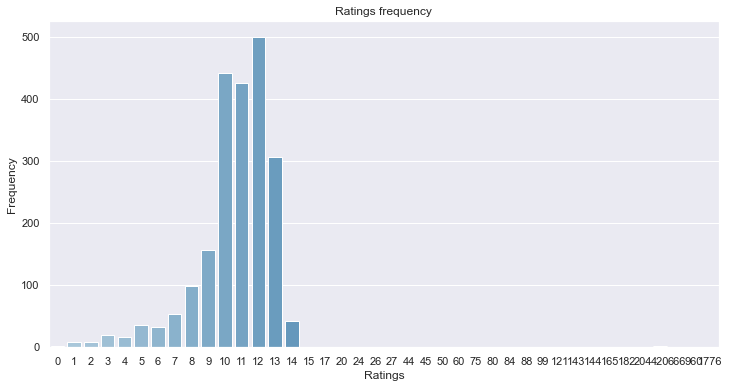

In [1006]:
data_values = df_all.rating_numerator.value_counts()

x = data_values.index
y = data_values.values
fig, ax = plt.subplots(figsize=(12, 6))
g = sns.barplot(x, y, palette='Blues_d', ax=ax)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()

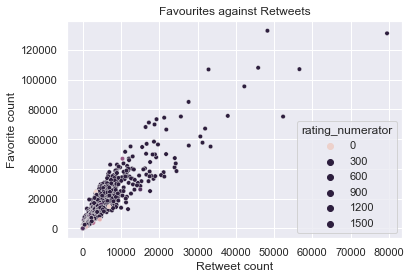

In [1033]:
ax = sns.scatterplot(x='retweet_count', y='favorite_count', data=df_all,
                     hue='rating_numerator', hue_norm=(1, 8), s=20) 
ax.set(xlabel='Retweet count', ylabel='Favorite count', title='Favourites against Retweets')
plt.savefig('twitter_source_plot')
plt.show()

It can be observed there is a positive correlation between retweet count and favourite count.

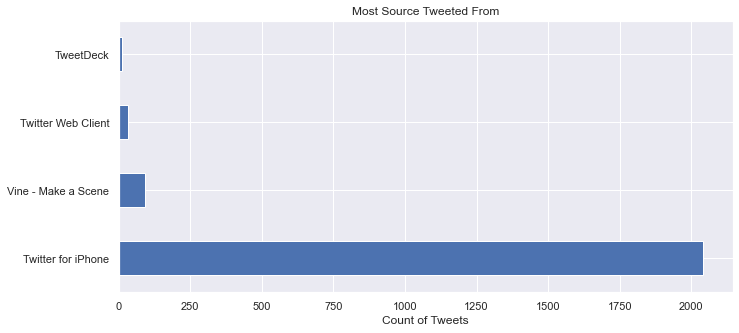

In [1029]:
df_all['source'].value_counts().plot(kind='barh', 
                                     figsize=(11,5),
                                     title='Most Source Tweeted From').set_xlabel("Count of Tweets")
plt.savefig('twitter_source_plot')
plt.show()

It is observed that most tweets on WeRateDogs were tweeted from iPhones

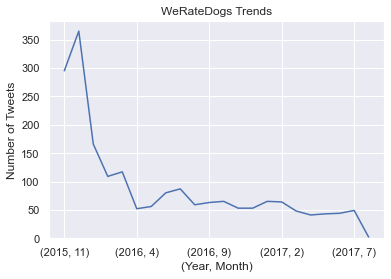

In [923]:
data = df_all.tweet_id.groupby([df_all['timestamp'].dt.year, df_all['timestamp'].dt.month]).count()
ax = data.plot(kind='line', title='WeRateDogs Trends')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Count of Tweets")
ax.set_ylim(0, )
plt.savefig('tweet_trend')
plt.show()

It is observed 2015 had the hightest number of tweets

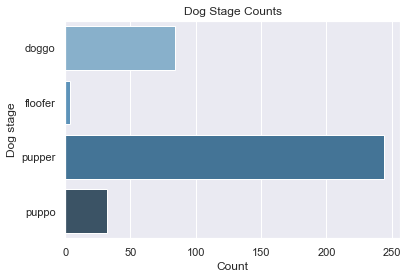

In [1034]:
data = df_all.groupby('dog_stage').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='Count', ylabel='Dog stage', title='Dog Stage Counts')
plt.savefig('dig_stage')
plt.show()


Out of the four main dog stages, Pupper was the most populous stage count

In [907]:
df_all.to_csv('df_all', index = False)